In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/STECH/Reinforcement Learning1

/content/drive/MyDrive/STECH/Reinforcement Learning1


In [ ]:
!pip install git+https://github.com/AI4Finance-LLC/FinRL-Library.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/AI4Finance-LLC/FinRL-Library.git to /tmp/pip-req-build-_53n19ez
  Running command git clone -q https://github.com/AI4Finance-LLC/FinRL-Library.git /tmp/pip-req-build-_53n19ez
  Cloning https://github.com/quantopian/pyfolio.git to /tmp/pip-install-oqyflfo0/pyfolio_9864d3442aac4c5ea3c23f976cce2185
  Running command git clone -q https://github.com/quantopian/pyfolio.git /tmp/pip-install-oqyflfo0/pyfolio_9864d3442aac4c5ea3c23f976cce2185
  Cloning https://github.com/AI4Finance-Foundation/ElegantRL.git to /tmp/pip-install-oqyflfo0/elegantrl_fabdcb6b1a5e4aaa8331e6bb08cbc53a
  Running command git clone -q https://github.com/AI4Finance-Foundation/ElegantRL.git /tmp/pip-install-oqyflfo0/elegantrl_fabdcb6b1a5e4aaa8331e6bb08cbc53a
     |████████████████████████████████| 234 kB 58.4 MB/s 
     |████████████████████████████████| 177 kB 66.1 MB/s 
     |█████████████████████

In [ ]:
from finrl import config
from finrl import config_tickers
import os
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# matplotlib.use('Agg')
import datetime

%matplotlib inline
from finrl.finrl_meta.preprocessor.yahoodownloader import YahooDownloader
from finrl.finrl_meta.preprocessor.preprocessors import FeatureEngineer, data_split
from finrl.finrl_meta.env_stock_trading.env_stocktrading import StockTradingEnv
from finrl.agents.stablebaselines3.models import DRLAgent
from finrl.finrl_meta.data_processor import DataProcessor

from finrl.plot import backtest_stats, backtest_plot, get_daily_return, get_baseline
from pprint import pprint

# import sys
# sys.path.append("../FinRL-Library")

import itertools

In [ ]:
!pip install tensorflow-gpu==1.15.0 tensorflow==1.15.0 stable-baselines gym-anytrading gym

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 411.5 MB 7.5 kB/s 
     |████████████████████████████████| 412.3 MB 28 kB/s 
     |████████████████████████████████| 50 kB 9.2 MB/s 
     |████████████████████████████████| 503 kB 54.0 MB/s 
     |████████████████████████████████| 3.8 MB 65.5 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=74996372bb19a9d520078b20d3da5fe9c44a1e169804f6f00a3eb7d75043ad16
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
     

In [ ]:
df = pd.read_csv('datasets/transform.csv')

In [ ]:
fe = FeatureEngineer(
                    use_technical_indicator=True,
                    tech_indicator_list = config.INDICATORS,
                    use_vix=True,
                    use_turbulence=True,
                    user_defined_feature = False)

processed = fe.preprocess_data(df)

Successfully added technical indicators
[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (7309, 8)
Successfully added vix
Successfully added turbulence index


In [ ]:
list_ticker = processed['tic'].unique().tolist()
list_date = list(pd.date_range(processed['date'].min(),processed['date'].max()).astype(str))
combination = list(itertools.product(list_date,list_ticker))

In [ ]:
processed_full = pd.DataFrame(combination, columns=['date','tic']).merge(processed,on=['date','tic'], how='left')

In [ ]:
processed_full

,date,tic,open,high,low,close,volume,day,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma,vix,turbulence
0,1993-05-10,EURAUD,1.76307,1.77368,1.75904,1.75904,0.0,0.0,0.000000,1.772973,1.729867,0.000000,-66.666667,100.000000,1.759040,1.759040,13.720000,0.000000
1,1993-05-10,USDAUD,1.41110,1.42720,1.41040,1.42370,0.0,0.0,0.000000,1.772973,1.729867,0.000000,-66.666667,100.000000,1.423700,1.423700,13.720000,0.000000
2,1993-05-10,USDCAD,1.26830,1.27110,1.26610,1.27110,0.0,0.0,0.000000,1.772973,1.729867,0.000000,-66.666667,100.000000,1.271100,1.271100,13.720000,0.000000
3,1993-05-10,USDCHF,1.42710,1.46090,1.42650,1.45860,0.0,0.0,0.000000,1.772973,1.729867,0.000000,-66.666667,100.000000,1.458600,1.458600,13.720000,0.000000
4,1993-05-10,USDGBP,0.63840,0.65320,0.63800,0.65130,0.0,0.0,0.000000,1.772973,1.729867,0.000000,-66.666667,100.000000,0.651300,0.651300,13.720000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63589,2022-05-16,USDAUD,1.44100,1.45476,1.43234,1.43390,0.0,0.0,0.022582,1.470520,1.316685,58.366845,120.064722,19.295117,1.373169,1.376788,27.469999,13.566394
63590,2022-05-16,USDCAD,1.29163,1.29814,1.28362,1.28449,279373.0,0.0,0.008995,1.310764,1.243793,53.756782,82.904547,0.330439,1.268975,1.269934,27.469999,13.566394
63591,2022-05-16,USDCHF,1.00131,1.00643,1.00072,1.00176,148198.0,0.0,0.017009,1.013379,0.923431,73.113053,142.765555,73.491745,0.955353,0.940382,27.469999,13.566394
63592,2022-05-16,USDGBP,0.81549,0.81848,0.81113,0.81160,0.0,0.0,0.013895,0.831083,0.750746,66.969186,115.218993,47.222252,0.781715,0.764825,27.469999,13.566394


In [ ]:
processed_full = processed_full[processed_full['date'].isin(processed['date'])]

In [ ]:
processed_full = processed_full.sort_values(['date','tic'])

In [ ]:
processed_full

,date,tic,open,high,low,close,volume,day,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma,vix,turbulence
0,1993-05-10,EURAUD,1.76307,1.77368,1.75904,1.75904,0.0,0.0,0.000000,1.772973,1.729867,0.000000,-66.666667,100.000000,1.759040,1.759040,13.720000,0.000000
1,1993-05-10,USDAUD,1.41110,1.42720,1.41040,1.42370,0.0,0.0,0.000000,1.772973,1.729867,0.000000,-66.666667,100.000000,1.423700,1.423700,13.720000,0.000000
2,1993-05-10,USDCAD,1.26830,1.27110,1.26610,1.27110,0.0,0.0,0.000000,1.772973,1.729867,0.000000,-66.666667,100.000000,1.271100,1.271100,13.720000,0.000000
3,1993-05-10,USDCHF,1.42710,1.46090,1.42650,1.45860,0.0,0.0,0.000000,1.772973,1.729867,0.000000,-66.666667,100.000000,1.458600,1.458600,13.720000,0.000000
4,1993-05-10,USDGBP,0.63840,0.65320,0.63800,0.65130,0.0,0.0,0.000000,1.772973,1.729867,0.000000,-66.666667,100.000000,0.651300,0.651300,13.720000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63589,2022-05-16,USDAUD,1.44100,1.45476,1.43234,1.43390,0.0,0.0,0.022582,1.470520,1.316685,58.366845,120.064722,19.295117,1.373169,1.376788,27.469999,13.566394
63590,2022-05-16,USDCAD,1.29163,1.29814,1.28362,1.28449,279373.0,0.0,0.008995,1.310764,1.243793,53.756782,82.904547,0.330439,1.268975,1.269934,27.469999,13.566394
63591,2022-05-16,USDCHF,1.00131,1.00643,1.00072,1.00176,148198.0,0.0,0.017009,1.013379,0.923431,73.113053,142.765555,73.491745,0.955353,0.940382,27.469999,13.566394
63592,2022-05-16,USDGBP,0.81549,0.81848,0.81113,0.81160,0.0,0.0,0.013895,0.831083,0.750746,66.969186,115.218993,47.222252,0.781715,0.764825,27.469999,13.566394


In [ ]:
train = data_split(processed_full, '2009-01-01','2020-07-01')
trade = data_split(processed_full, '2020-07-01','2021-10-31')
print(len(train))
print(len(trade))

13782
1614


In [ ]:
stock_dimension = len(train.tic.unique())
state_space = 1 + 2*stock_dimension + len(config.INDICATORS)*stock_dimension

In [ ]:
buy_cost_list = sell_cost_list = [0.001] * stock_dimension
num_stock_shares = [0] * stock_dimension

In [ ]:
env_kwargs = {
    "hmax": 100,
    "initial_amount": 1000000,
    "num_stock_shares": num_stock_shares,
    "buy_cost_pct": buy_cost_list,
    "sell_cost_pct": sell_cost_list,
    "state_space": state_space,
    "stock_dim": stock_dimension,
    "tech_indicator_list": config.INDICATORS,
    "action_space": stock_dimension,
    "reward_scaling": 1e-4
}

In [ ]:
e_train_gym = StockTradingEnv(df=train, **env_kwargs)

In [ ]:
env_train, _ = e_train_gym.get_sb_env()
print(type(env_train))

<class 'stable_baselines3.common.vec_env.dummy_vec_env.DummyVecEnv'>


In [ ]:
agent = DRLAgent(env=env_train)

In [ ]:
PPO_PARAMS = {
    "n_steps": 2048,
    "ent_coef": 0.01,
    "learning_rate": 0.00025,
    "batch_size": 128,
}
model_ppo = agent.get_model('ppo', model_kwargs=PPO_PARAMS)

{'n_steps': 2048, 'ent_coef': 0.01, 'learning_rate': 0.00025, 'batch_size': 128}
Using cuda device


In [ ]:
trained_ppo = agent.train_model(model=model_ppo, 
                             tb_log_name='ppo',
                             total_timesteps=2000000)

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
|    reward               | 0.044461306  |
|    std                  | 3.21         |
|    value_loss           | 0.191        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 284          |
|    iterations           | 737          |
|    time_elapsed         | 5306         |
|    total_timesteps      | 1509376      |
| train/                  |              |
|    approx_kl            | 0.0071705002 |
|    clip_fraction        | 0.0495       |
|    clip_range           | 0.2          |
|    entropy_loss         | -15.4        |
|    explained_variance   | 0.128        |
|    learning_rate        | 0.00025      |
|    loss                 | -0.026       |
|    n_updates            | 7360         |
|    policy_gradient_loss | -0.00385     |
|    reward               | -0.057514623 |
|    std                  | 3.2         

In [ ]:
PPO_Path = os.path.join('trained_models','PPO_Model')

In [ ]:
trained_ppo.save(PPO_Path)

In [ ]:
data_risk_indicator = processed_full[(processed_full.date<'2020-07-01') & (processed_full.date>='2009-01-01')]
insample_risk_indicator = data_risk_indicator.drop_duplicates(subset=['date'])

In [ ]:
insample_risk_indicator.vix.describe()

count    2297.000000
mean       18.878755
std         8.522991
min         9.150000
25%        13.370000
50%        16.209999
75%        21.299999
max        82.690002
Name: vix, dtype: float64

In [ ]:
e_trade_gym = StockTradingEnv(df=trade,
                              turbulence_threshold=70,
                              risk_indicator_col='vix',**env_kwargs)

In [ ]:
df_account_value, df_actions = DRLAgent.DRL_prediction(
    model=trained_ppo,
    environment = e_trade_gym
)

hit end!


In [ ]:
df_account_value.shape

(269, 2)

In [ ]:
df_account_value.tail()

,date,account_value
264,2021-10-21,998701.298057
265,2021-10-25,998241.763383
266,2021-10-26,998141.725442
267,2021-10-27,998164.132876
268,2021-10-28,997756.753225


In [ ]:
df_actions.shape

(268, 6)

In [ ]:
df_actions.head()

,EURAUD,USDAUD,USDCAD,USDCHF,USDGBP,USDJPY
date,,,,,,
2020-07-01,100,100,0,0,0,0
2020-07-02,100,100,0,0,0,0
2020-07-06,100,100,0,0,0,0
2020-07-07,100,100,0,0,0,0
2020-07-08,100,100,0,0,0,0


In [ ]:
print("==============Get Backtest Results===========")
now = datetime.datetime.now().strftime('%Y%m%d-%Hh%M')
perf_stats_all = backtest_stats(account_value=df_account_value)
perf_stats_all = pd.DataFrame(perf_stats_all)
perf_stats_all.to_csv('./'+config.RESULTS_DIR+'/perf_stats_all'+now+'.csv')

==============Get Backtest Results===========
Annual return         -0.002102
Cumulative returns    -0.002243
Annual volatility      0.002661
Sharpe ratio          -0.792246
Calmar ratio          -0.480334
Stability              0.000340
Max drawdown          -0.004375
Omega ratio            0.865248
Sortino ratio         -1.077084
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.005320
Daily value at risk   -0.000344
dtype: float64


In [ ]:
print("==============Get Baseline Stats===========")
baseline_df = get_baseline(
        ticker="^DJI", 
        start = df_account_value.loc[0,'date'],
        end = df_account_value.loc[len(df_account_value)-1,'date'])

stats = backtest_stats(baseline_df, value_col_name = 'close')

==============Get Baseline Stats===========
[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (335, 8)
Annual return          0.273520
Cumulative returns     0.379084
Annual volatility      0.139248
Sharpe ratio           1.811893
Calmar ratio           3.062662
Stability              0.918651
Max drawdown          -0.089308
Omega ratio            1.351851
Sortino ratio          2.684720
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.051856
Daily value at risk   -0.016542
dtype: float64


==============Compare to DJIA===========
[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (335, 8)


Start date,2020-07-01
End date,2021-10-28
Total months,12
,Backtest
Annual return,-0.21%
Cumulative returns,-0.224%
Annual volatility,0.266%
Sharpe ratio,-0.79
Calmar ratio,-0.48
Stability,0.00
Max drawdown,-0.438%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,0.44,2021-08-19,2021-10-28,NaT,NaN
1,0.29,2020-10-19,2021-02-23,2021-07-19,196
2,0.04,2021-07-29,2021-08-05,2021-08-16,13
3,0.04,2021-07-19,2021-07-22,2021-07-29,9
4,0.03,2020-07-13,2020-08-31,2020-09-22,52


Stress Events,mean,min,max
New Normal,-0.00%,-0.07%,0.05%


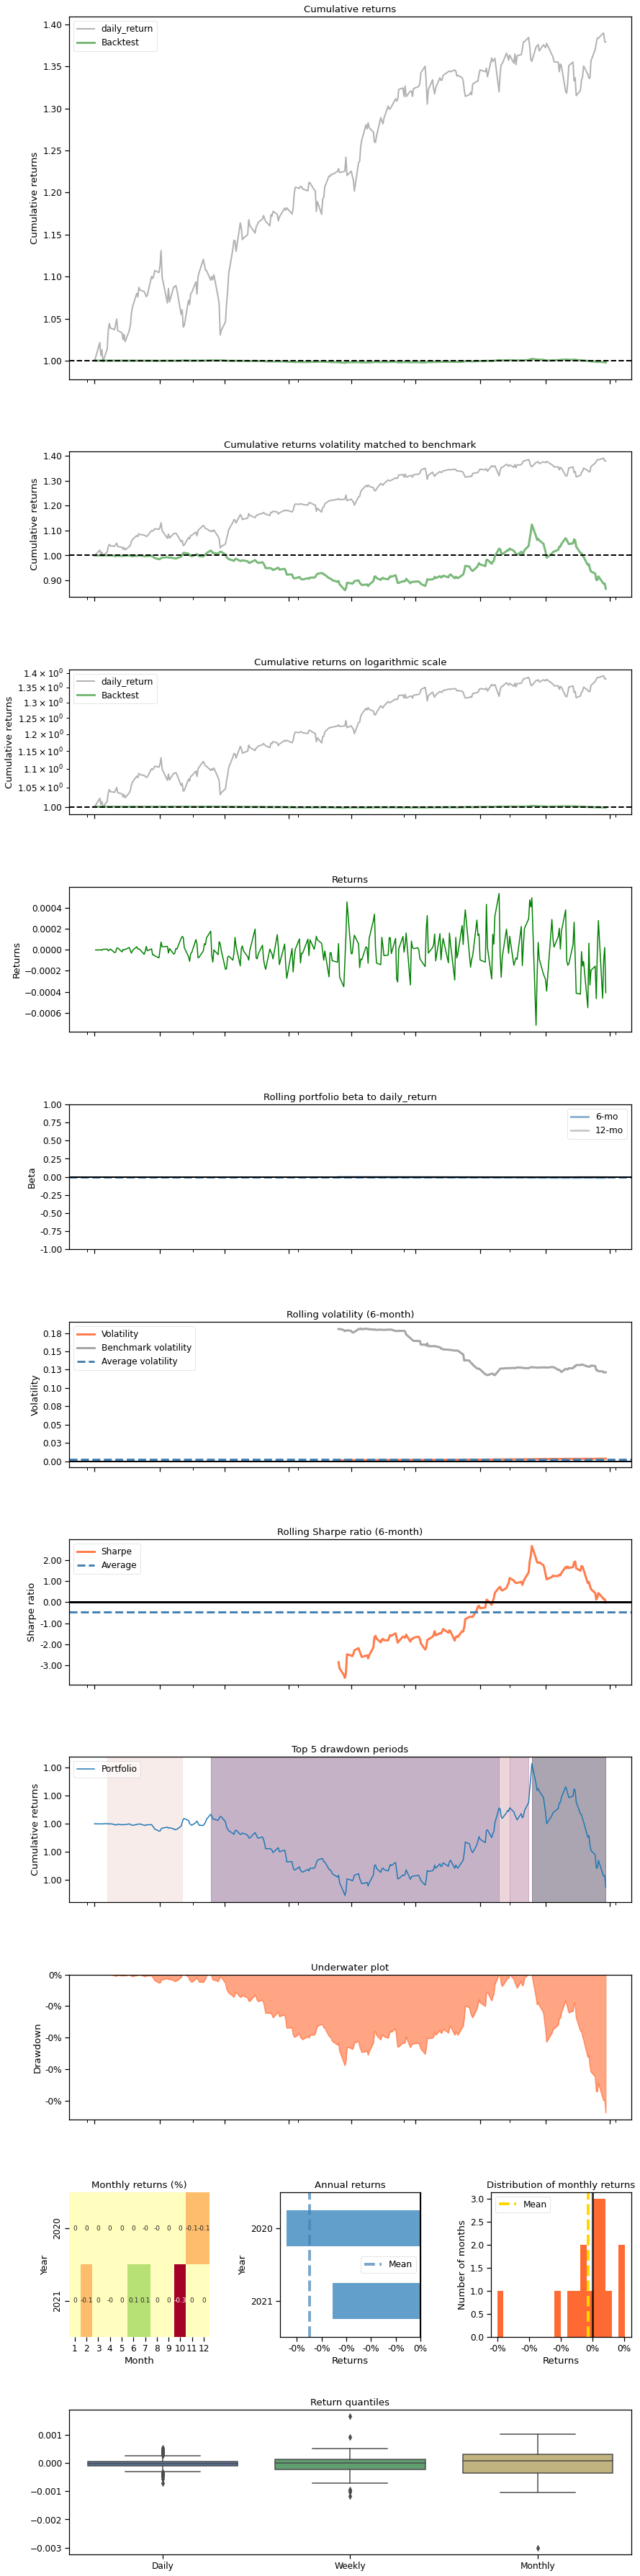

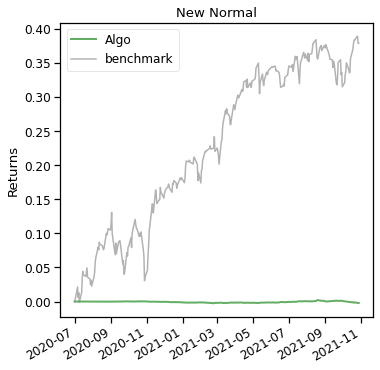

In [ ]:
print("==============Compare to DJIA===========")
%matplotlib inline
# S&P 500: ^GSPC
# Dow Jones Index: ^DJI
# NASDAQ 100: ^NDX
backtest_plot(df_account_value, 
             baseline_ticker = '^DJI', 
             baseline_start = df_account_value.loc[0,'date'],
             baseline_end = df_account_value.loc[len(df_account_value)-1,'date'])